In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

#244x 244 사이즈로 리사이즈를 하고, 정규화를 해줍니다.
def format_image(image,label):
    image = tf.image.resize(image,(224,224))/255.0
    return image, label

#훈련, 검증, 테스트 세트로 나눕니다.
(raw_train, raw_validation, raw_test), metadata =tfds.load(
    'citrus_leaves',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

print(metadata)

num_examples = metadata.splits['train'].num_examples
num_classes = metadata.features['label'].num_classes


BATCH_SIZE = 32
train_batches = raw_train.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = raw_validation.map(format_image).batch(BATCH_SIZE).prefetch(1)

test_batches = raw_test.map(format_image).batch(1)

c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tfds.core.DatasetInfo(
    name='citrus_leaves',
    full_name='citrus_leaves/0.1.2',
    description="""
    The original citrus dataset contains 759 images of healthy and unhealthy citrus
    fruits and leaves. However, for now we only export 594 images of citrus leaves
    with the following labels: Black Spot, Canker, Greening, and Healthy. The
    exported images are in PNG format and have 256x256 pixels.
    
    NOTE: Leaf images with Melanose label were dropped due to very small count and
    other non-leaf images being present in the same directory.
    
    Dataset URL: https://data.mendeley.com/datasets/3f83gxmv57/2
    License: http://creativecommons.org/licenses/by/4.0
    """,
    homepage='https://data.mendeley.com/datasets/3f83gxmv57/2',
    data_dir='C:\\Users\\EMBEDDED\\tensorflow_datasets\\citrus_leaves\\0.1.2',
    file_format=tfrecord,
    download_size=63.87 MiB,
    dataset_size=27.99 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), 

In [43]:
#케라스 허브에서 모델 가져오기
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

#244x 244 사이즈로 리사이즈를 하고, 정규화를 해줍니다.
def format_image(image,label):
    image = tf.image.resize(image,(224,224))/255.0
    return image, label #labels: Black Spot, Canker, Greening, and Healthy

#훈련, 검증, 테스트 세트로 나눕니다.
(raw_train, raw_validation, raw_test), metadata =tfds.load(
    'citrus_leaves',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

print(metadata)

num_examples = metadata.splits['train'].num_examples
num_classes = metadata.features['label'].num_classes


BATCH_SIZE = 32
train_batches = raw_train.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = raw_validation.map(format_image).batch(BATCH_SIZE).prefetch(1)

test_batches = raw_test.map(format_image).batch(1)

model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/tf2-preview-feature-vector/versions/4",
                   input_shape = (224,224,3),
                   output_shape=[1280],
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics =['accuracy']
)

hist = model.fit(
    train_batches,
    epochs = 5,
    validation_data = validation_batches
)

model.summary()

#학습된 모델 저장하기 

#colab_
#CITRUS_LEAVES_SAVED_MODEL = "/content/drive/MyDrive/exp_saved_model"

#pc_
CITRUS_LEAVES_SAVED_MODEL = 'C:\Users\EMBEDDED\Desktop\new\exp_saved_model'
tf.saved_model.save(model, CITRUS_LEAVES_SAVED_MODEL)

#tensoflow lite로 변환하기 converted_
converter = tf.lite.TFLiteConverter.from_saved_model(CITRUS_LEAVES_SAVED_MODEL)
tflite_model = converter.convert()
tflite_model_file = 'converted_exp_saved_model'

#with open(…) as f 에서 f는 open(…)함수가 리턴한 file object.
with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)


interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_details = interpreter.get_input_details()[0]
print('input: ', input_details)
output_details = interpreter.get_output_details()[0]
print('output: ', output_details)

tfds.core.DatasetInfo(
    name='citrus_leaves',
    full_name='citrus_leaves/0.1.2',
    description="""
    The original citrus dataset contains 759 images of healthy and unhealthy citrus
    fruits and leaves. However, for now we only export 594 images of citrus leaves
    with the following labels: Black Spot, Canker, Greening, and Healthy. The
    exported images are in PNG format and have 256x256 pixels.
    
    NOTE: Leaf images with Melanose label were dropped due to very small count and
    other non-leaf images being present in the same directory.
    
    Dataset URL: https://data.mendeley.com/datasets/3f83gxmv57/2
    License: http://creativecommons.org/licenses/by/4.0
    """,
    homepage='https://data.mendeley.com/datasets/3f83gxmv57/2',
    data_dir='C:\\Users\\EMBEDDED\\tensorflow_datasets\\citrus_leaves\\0.1.2',
    file_format=tfrecord,
    download_size=63.87 MiB,
    dataset_size=27.99 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), 

INFO:tensorflow:Assets written to: exp_saved_model\assets


input:  {'name': 'serving_default_keras_layer_3_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3]), 'shape_signature': array([ -1, 224, 224,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output:  {'name': 'StatefulPartitionedCall:0', 'index': 177, 'shape': array([1, 4]), 'shape_signature': array([-1,  4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


In [44]:
#.tflite로 변환후 추론 테스트
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

#테스트 배치 파일을 10개 씩 가져와서
predictions =[]
test_labels, test_imgs = [],[]
for img, label in test_batches.take(10):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    test_labels.append(label.numpy()[0])
    test_imgs.append(img)

print("predictions:",predictions)
print("labels:",test_labels)

#예측 수 비교
score  = 0
for item in range(0,10):
    prediction = np.argmax(predictions[item])
    label = test_labels[item]
    if prediction == label:
        score = score +1


print("10개 중 맞은 예측 수: "+ str(score))

predictions: [array([[1.0501039e-04, 2.0126635e-01, 7.5851059e-01, 4.0118113e-02]],
      dtype=float32), array([[7.3326482e-05, 2.4060054e-02, 9.6847111e-01, 7.3955175e-03]],
      dtype=float32), array([[0.00056378, 0.0382569 , 0.5603013 , 0.40087804]], dtype=float32), array([[0.00125615, 0.04748192, 0.8892798 , 0.06198215]], dtype=float32), array([[0.00086882, 0.7422312 , 0.2261185 , 0.03078142]], dtype=float32), array([[5.3285421e-06, 3.4475962e-03, 9.9518824e-01, 1.3588237e-03]],
      dtype=float32), array([[1.7682079e-04, 6.5908685e-02, 9.1757578e-01, 1.6338611e-02]],
      dtype=float32), array([[7.3266565e-05, 1.1103739e-01, 8.5206032e-01, 3.6829028e-02]],
      dtype=float32), array([[7.3471783e-05, 4.0780202e-02, 9.3892127e-01, 2.0225078e-02]],
      dtype=float32), array([[1.5452164e-04, 9.8738551e-01, 5.2014124e-03, 7.2585815e-03]],
      dtype=float32)]
labels: [2, 2, 2, 2, 1, 2, 2, 2, 2, 1]
10개 중 맞은 예측 수: 10


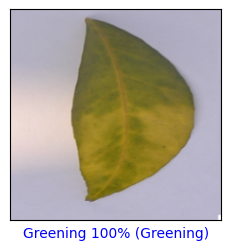

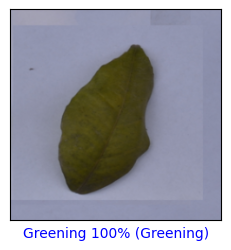

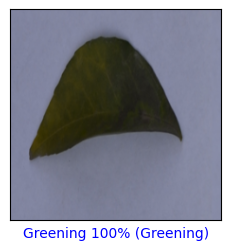

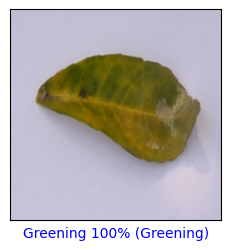

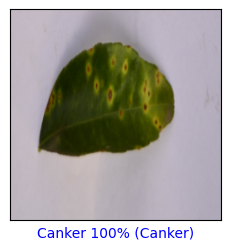

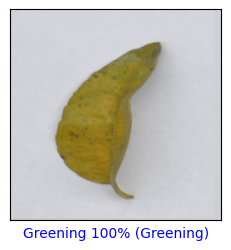

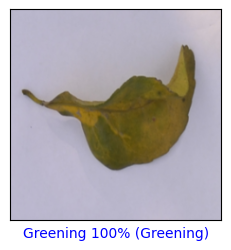

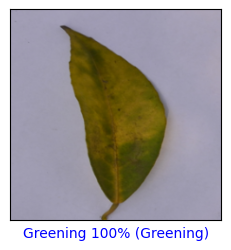

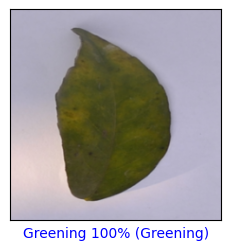

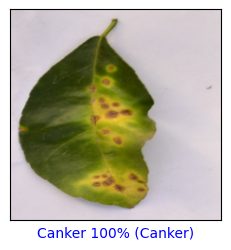

"    \nfor index in range(0,9):\n\n    if index%2 == 0 :\n      plt.figure(figsize = (6,3))\n      plt.subplot(121)\n    elif index %2 ==1 :\n      plt.subplot(122)\n\n    plot_image(index, predictions, test_labels, test_imgs)\n    if index %2 ==1:\n      plt.show()\n      imgFile = 'resultImg/result{}.png'.format(index)\n      plt.savefig(imgFile)\n"

In [45]:
class_names = ['Black Spot', 'Canker', 'Greening', 'Healthy']


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # 't' is a tensor of shape [1, 2, 1, 3, 1, 1]
    img = tf.squeeze(img) # [2, 3]

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array[index])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)
    
for index in range(0, 10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(index, predictions, test_labels, test_imgs)
    plt.show()
    
'''    
for index in range(0,9):

    if index%2 == 0 :
      plt.figure(figsize = (6,3))
      plt.subplot(121)
    elif index %2 ==1 :
      plt.subplot(122)

    plot_image(index, predictions, test_labels, test_imgs)
    if index %2 ==1:
      plt.show()
      imgFile = 'resultImg/result{}.png'.format(index)
      plt.savefig(imgFile)
'''

In [5]:
# 대표 샘플을 뽑아서, variable data 양자화
def representative_data_gen():                                                  #모델의 양자화 (Quantization)를 위한 대표 데이터를 생성
  for input_value, _ in test_batches.take(100):
    yield [input_value]                                                         #대표 데이터를 생성, 모델 양자화에 사용

converter = tf.lite.TFLiteConverter.from_saved_model(CITRUS_LEAVES_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]                            #모델에 기본적인 최적화를 적용
converter.representative_dataset = representative_data_gen

tflite_model_ffq = converter.convert()
tflite_model_file = 'ffq_converted_exp_saved_model'
with open(tflite_model_file, "wb") as f:
  f.write(tflite_model_ffq)


interpreter = tf.lite.Interpreter(model_content=tflite_model_ffq)
input_details = interpreter.get_input_details()[0]
print('input: ', input_details)
output_details = interpreter.get_output_details()[0]
print('output: ', output_details)


input:  {'name': 'serving_default_keras_layer_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3]), 'shape_signature': array([ -1, 224, 224,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output:  {'name': 'StatefulPartitionedCall:0', 'index': 179, 'shape': array([1, 4]), 'shape_signature': array([-1,  4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
